In [1]:
# pip install bs4

In [2]:
# pip install requests

In [3]:
import requests
from bs4 import BeautifulSoup   #for web scraping
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from nltk.sentiment.vader import SentimentIntensityAnalyzer  #for sentiment analysis

In [4]:
def getdata(url):
    r = requests.get(url)
    return r.text
  
  
def html_code(url):
  
    # pass the url
    # into getdata function
    htmldata = getdata(url)
    soup = BeautifulSoup(htmldata, 'html.parser')
  
    # display html code
    return (soup)

In [5]:
url = "http://shorturl.at/aDGRV"
url1 = "https://www.amazon.in/PUMA-Black-White-Running-19324901/dp/B081444CH2/ref=sr_1_10?crid=2RNR131WXOGKL&keywords=puma+shoes&qid=1659031890&sprefix=puma+shoe%2Caps%2C362&sr=8-10"

In [6]:
soup = html_code(url)
# print(soup)

In [7]:
print(soup.title.text[0:-13])

Puma Morgan Sl Running Shoes Men Reviews: Latest Review of Puma Morgan Sl Running Shoes Men | Price in India |


In [8]:
def cus_data(soup):
    # find the Html tag
    # with find()
    # and convert into string
    data_str = ""
    cus_list = []
  
    for item in soup.find_all('p', class_='_2sc7ZR _2V5EHH _1QgsS5'):
        data_str = data_str + item.get_text()
        cus_list.append(data_str)
        data_str = ""
    return cus_list
  
  
cus_res = cus_data(soup)

In [10]:
print(cus_res)

['Customer', 'Joshua Joji Matthews', 'Customer', 'Customer', 'Bishnu Sonar', 'Customer', 'Customer', 'Nelson Hembrom', 'Customer', 'Sandy Frank']


In [11]:
def cus_rev(soup):
    # find the Html tag
    # with find()
    # and convert into string
    data_str = ""
    result = []
  
    for item in soup.find_all("div", class_="_6K-7Co"):
        # data_str = data_str + item.get_text()
        result.append(item.get_text())
  
    # result = data_str.split("\n")
    return (result)
  
  
rev_data = cus_rev(soup)
rev_result = rev_data
# for i in rev_data:
#     if i is "":
#         pass
#     else:
#         rev_result.append(i)
# rev_result

In [13]:
rev_data

["Believe me or not idk....but i too belong frm a middle class family....nd i too have the desire to wear branded shoes...so middle classers don't chase to buy a nike shoe when u r getting such a pair of good shoes at such a cheap rate.......so love u seller nd love u amazon ❤️❤️❤️",
 'Amazing shoeFantastic comfortable everything is ok no size issue. Thnq amazon']

1. remove stopwords
synoynms of good if has a higher count then it is a true product.

In [14]:
def prod_rating(soup):
  rating = []
  for item in soup.find_all('div', class_='_3LWZlK _1BLPMq _3B8WaH'):
    rating.append(item.get_text())
  
  return rating

ratings = prod_rating(soup)
print(ratings)

['5', '5', '5', '5', '5', '5', '5', '5', '4', '4']


In [15]:
id = [i for i in range(1,len(ratings)+1)]
id

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [19]:
final_data = pd.DataFrame(id, columns=['ID'])
final_data['Customer Name'] = cus_res
final_data['Rating'] = ratings
final_data['Review'] = rev_data

In [20]:
final_data

,ID,Customer Name,Rating,Review
0,1,Customer,5,Believe me or not idk....but i too belong frm ...
1,2,Joshua Joji Matthews,5,Nice
2,3,Customer,5,good product
3,4,Customer,5,I order 7 size and got 8 no. But it's ok for m...
4,5,Bishnu Sonar,5,Best product ever...8/10
5,6,Customer,5,very good 👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌
6,7,Customer,5,Amazing shoeFantastic comfortable everything i...
7,8,Nelson Hembrom,5,nice
8,9,Customer,4,Comfortable for Casual wear and Gym as well. U...
9,10,Sandy Frank,4,Good product


In [21]:
final_data.describe()

,ID
count,10.00000
mean,5.50000
std,3.02765
min,1.00000
25%,3.25000
50%,5.50000
75%,7.75000
max,10.00000


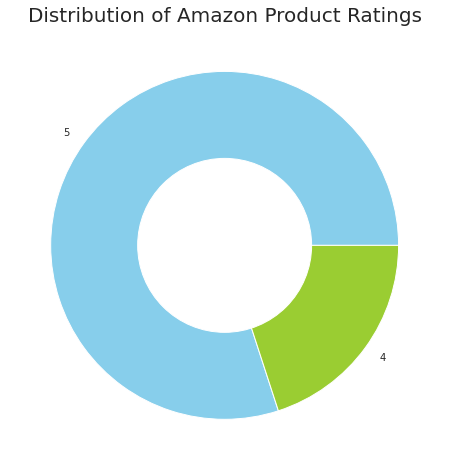

In [22]:
ratings = final_data["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()

In [23]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
sentiments = SentimentIntensityAnalyzer()
final_data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in final_data["Review"]]
final_data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in final_data["Review"]]
final_data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in final_data["Review"]]

In [25]:
final_data

,ID,Customer Name,Rating,Review,Positive,Negative,Neutral
0,1,Customer,5,Believe me or not idk....but i too belong frm ...,0.259,0.000,0.741
1,2,Joshua Joji Matthews,5,Nice,1.000,0.000,0.000
2,3,Customer,5,good product,0.744,0.000,0.256
3,4,Customer,5,I order 7 size and got 8 no. But it's ok for m...,0.271,0.076,0.654
4,5,Bishnu Sonar,5,Best product ever...8/10,0.677,0.000,0.323
5,6,Customer,5,very good 👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌,0.615,0.000,0.385
6,7,Customer,5,Amazing shoeFantastic comfortable everything i...,0.503,0.119,0.378
7,8,Nelson Hembrom,5,nice,1.000,0.000,0.000
8,9,Customer,4,Comfortable for Casual wear and Gym as well. U...,0.302,0.000,0.698
9,10,Sandy Frank,4,Good product,0.744,0.000,0.256


In [26]:
x = sum(final_data["Positive"])
y = sum(final_data["Negative"])
z = sum(final_data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Positive 😊 


In [27]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  6.114999999999999
Negative:  0.195
Neutral:  3.691
